In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import asarray
from numpy import save
import keras
import os
from os import listdir
import cv2 as cv
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split

In [ ]:
folder  = '/content/drive/MyDrive/emotion/angry'
folder1 ='/content/drive/MyDrive/emotion/disgust'
folder2 = '/content/drive/MyDrive/emotion/fear'
folder3 = '/content/drive/MyDrive/emotion/happy'
folder4 = '/content/drive/MyDrive/emotion/neutral'
folder5 = '/content/drive/MyDrive/emotion/sad'
folder6 = '/content/drive/MyDrive/emotion/surprise'
folders=[folder,folder1,folder2,folder3,folder4,folder5,folder6]
photos, labels = list(), list()
for i in range (7):
  for file in listdir(folders[i]):
    output=i

    photo = load_img(folders[i]+'/'+file, target_size=(48,48))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/emotion1/emotion_photos.npy',photos)
save('/content/drive/MyDrive/emotion1/emotion_labels.npy',labels)

(34826, 48, 48, 3) (34826,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.3, random_state=2)

In [ ]:
x_train /= 255
x_test /= 255
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [ ]:
#tạo model
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(48,48,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(512,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))


In [ ]:
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))  #Dense la full connected 
model.add(Dense(7, activation='Softmax'))

In [ ]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1,validation_data=(x_test, y_test))

Epoch 1/100
191/191 [==============================] - 17s 23ms/step - loss: 1.8137 - accuracy: 0.2657 - val_loss: 1.7106 - val_accuracy: 0.3053
Epoch 2/100
191/191 [==============================] - 4s 19ms/step - loss: 1.6132 - accuracy: 0.3680 - val_loss: 1.5339 - val_accuracy: 0.4051
Epoch 3/100
191/191 [==============================] - 4s 19ms/step - loss: 1.4713 - accuracy: 0.4404 - val_loss: 1.4614 - val_accuracy: 0.4383
Epoch 4/100
191/191 [==============================] - 4s 21ms/step - loss: 1.3602 - accuracy: 0.4840 - val_loss: 1.3588 - val_accuracy: 0.4900
Epoch 5/100
191/191 [==============================] - 4s 19ms/step - loss: 1.2558 - accuracy: 0.5242 - val_loss: 1.3035 - val_accuracy: 0.5033
Epoch 6/100
191/191 [==============================] - 4s 19ms/step - loss: 1.1682 - accuracy: 0.5624 - val_loss: 1.2485 - val_accuracy: 0.5268
Epoch 7/100
191/191 [==============================] - 4s 19ms/step - loss: 1.0757 - accuracy: 0.6014 - val_loss: 1.2429 - val_accuracy

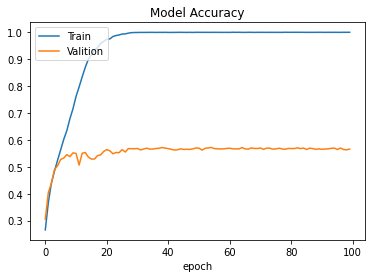

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Valition'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/emotion1/emotion_model.h5')